In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/adult-test.csv
/kaggle/input/adult-training.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
training_data = '../input/adult-training.csv'

In [4]:
test_data = '../input/adult-test.csv'

In [5]:
columns = ['Age', 'Workclass', 'fnlgwt', 'Education', 'Education num', 'Martial status', 'occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hour/week', 'Country', 'Above/below 50K']

In [6]:
train = pd.read_csv(training_data, names = columns)
test = pd.read_csv(test_data, names = columns)

In [7]:
train.head()

,Age,Workclass,fnlgwt,Education,Education num,Martial status,occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hour/week,Country,Above/below 50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
test.head()

,Age,Workclass,fnlgwt,Education,Education num,Martial status,occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hour/week,Country,Above/below 50K
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [9]:
test = test.drop(test.index[0]).head()

In [10]:
def missing_value(df):
    miss = []
    col_list = df.columns
    for i in col_list:
        missing = df[i].isnull().sum()
        miss.append(missing)
        list_of_missing = pd.DataFrame(list(zip(col_list, miss)))
    return list_of_missing


In [11]:
missing_value(train)

,0,1
0,Age,0
1,Workclass,0
2,fnlgwt,0
3,Education,0
4,Education num,0
5,Martial status,0
6,occupation,0
7,Relationship,0
8,Race,0
9,Sex,0


In [12]:
missing_value(test)

,0,1
0,Age,0
1,Workclass,0
2,fnlgwt,0
3,Education,0
4,Education num,0
5,Martial status,0
6,occupation,0
7,Relationship,0
8,Race,0
9,Sex,0


In [13]:
train.apply(lambda x: len(x.unique()))

Age                   73
Workclass              9
fnlgwt             21648
Education             16
Education num         16
Martial status         7
occupation            15
Relationship           6
Race                   5
Sex                    2
Capital Gain         119
Capital Loss          92
Hour/week             94
Country               42
Above/below 50K        2
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [15]:
test['Workclass'].value_counts()

 Private      3
 ?            1
 Local-gov    1
Name: Workclass, dtype: int64

In [16]:
train['Workclass'] =train['Workclass'].str.replace('?', 'Private')
test['Workclass'] =test['Workclass'].str.replace('?', 'Private')

In [17]:
train['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [18]:
train['occupation'] = train['occupation'].str.replace('?', 'Prof-specialty')

In [19]:
test['occupation'] = test['occupation'].str.replace('?', 'Prof-specialty')

In [20]:
test['Above/below 50K'] = test['Above/below 50K'].str.replace('K.', 'K')

In [21]:
train['Sex'].value_counts()

 Male      21790
 Female    10771
Name: Sex, dtype: int64

In [22]:
train_uni = train.apply(lambda x: len(x.unique()))

In [23]:
train_uni

Age                   73
Workclass              8
fnlgwt             21648
Education             16
Education num         16
Martial status         7
occupation            14
Relationship           6
Race                   5
Sex                    2
Capital Gain         119
Capital Loss          92
Hour/week             94
Country               42
Above/below 50K        2
dtype: int64

In [24]:
train_uni['Race']

5

In [25]:
X_train = train.iloc[:, :14]
y_train = train.iloc[:, 14]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [26]:
X_train.head()

,Age,Workclass,fnlgwt,Education,Education num,Martial status,occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hour/week,Country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [27]:
col = ['Workclass', 'Education', 'Education num', 'Martial status', 'occupation', 'Relationship', 'Race', 'Sex', 'Country']

In [28]:
col_mask = X_train.dtypes==object 

In [29]:
col_cat = [x for x in train.dtypes.index if train.dtypes[x] == 'object']

In [30]:
col_mask

Age               False
Workclass          True
fnlgwt            False
Education          True
Education num     False
Martial status     True
occupation         True
Relationship       True
Race               True
Sex                True
Capital Gain      False
Capital Loss      False
Hour/week         False
Country            True
dtype: bool

In [31]:
for col in train.columns:
    if train.dtypes[col] == 'object':
        if col != 'Above/below 50K':
            le = LabelEncoder()
            X_train[col] = le.fit_transform(X_train[col])
            X_test[col] = le.transform(X_test[col])
le1 = LabelEncoder()
y_train = le1.fit_transform(y_train)
y_test = le1.transform(y_test)

In [32]:
ohe = OneHotEncoder(categorical_features = col_mask, sparse = False)
train_ohe = ohe.fit_transform(X_train)
test_ohe = ohe.transform(X_test)


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
classifier = LogisticRegression(C = 1e7, random_state = 0)

In [35]:
classifier.fit(train_ohe, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
pred1 = classifier.predict(test_ohe)

In [37]:
pred1

array([0, 0, 0, 1, 0])

In [38]:
classifier.coef_

array([[ 1.34396601e-04,  5.28243377e-05, -2.24538646e-06,
        -2.01414414e-03,  3.18492130e-04, -1.67043951e-05,
        -1.43806568e-05, -5.11072379e-06, -2.33268267e-04,
        -3.34845125e-04, -1.06720583e-04, -3.97988735e-05,
        -7.82451736e-05, -1.62902969e-04, -1.28500065e-04,
        -3.18993139e-05, -3.31861797e-05,  8.32884306e-04,
         2.16071686e-04, -1.42789642e-03,  5.26302346e-04,
        -1.59288721e-05,  2.46385958e-04, -7.75324689e-04,
        -9.50151881e-04,  5.52616684e-06,  3.13470231e-03,
        -9.83119258e-05, -3.14723731e-03, -2.52884165e-04,
        -2.38515424e-04, -6.49302927e-04, -1.58493015e-06,
        -2.08795655e-04,  9.50833896e-04, -2.09279703e-04,
        -3.44808225e-04, -3.42473914e-04, -9.53258396e-04,
        -4.74860695e-05,  3.42987699e-04,  6.15775580e-05,
        -5.80185982e-05,  3.92584316e-05, -1.26521396e-04,
         2.81917014e-03, -1.84342747e-03, -2.79901254e-04,
        -1.71270906e-03, -8.85136551e-04,  3.55131961e-0

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred1)
print(cm)

[[3 0]
 [1 1]]


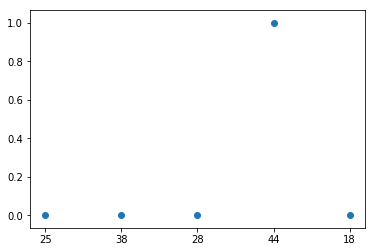

In [40]:
plt.scatter(X_test['Age'],pred1)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors = 2)
clf2.fit(X_train, y_train)
pred2 = clf2.predict(X_test)
cm2 = confusion_matrix(y_test, pred2)

In [42]:
pred2

array([0, 0, 0, 1, 0])

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier()
clf3.fit(train_ohe, y_train)
pred3 = clf3.predict(test_ohe)
cm3 = confusion_matrix(y_test, pred3)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
pred3

array([0, 0, 1, 1, 0])

In [45]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat = X_train.columns[(sel.get_support())]


In [46]:
selected_feat

Index(['Age', 'fnlgwt', 'Education num', 'Relationship', 'Capital Gain',
       'Hour/week'],
      dtype='object')

In [47]:
new_X_train = pd.DataFrame()
new_X_test = pd.DataFrame()

In [48]:
new_X_train['Age'] = X_train['Age']
new_X_train['fnlgwt'] = X_train['fnlgwt']
new_X_train['Education num'] = X_train['Education num']
new_X_train['Relationship'] = X_train['Relationship']
new_X_train['Capital Gain'] = X_train['Capital Gain']
new_X_train['Hour/week'] = X_train['Hour/week']

In [49]:
new_X_test['Age'] = X_test['Age']
new_X_test['fnlgwt'] = X_test['fnlgwt']
new_X_test['Education num'] = X_test['Education num']
new_X_test['Relationship'] = X_test['Relationship']
new_X_test['Capital Gain'] = X_test['Capital Gain']
new_X_test['Hour/week'] = X_test['Hour/week']

In [50]:
new_X_train.head()

,Age,fnlgwt,Education num,Relationship,Capital Gain,Hour/week
0,39,77516,13,1,2174,40
1,50,83311,13,0,0,13
2,38,215646,9,1,0,40
3,53,234721,7,0,0,40
4,28,338409,13,5,0,40


In [51]:
clf4 = RandomForestClassifier()
clf4.fit(new_X_train, y_train)
pred4 = clf4.predict(new_X_test)
cm4 = confusion_matrix(y_test, pred4)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
pred4

array([0, 0, 1, 1, 0])